# Funciones de distribucion de probabilidades [Clase 45] 

![freceuncia-PDF-CDF](../Recursos/imgs/freceuncia-PDF-CDF.PNG)

**PDF**: Probability Density Function o Funcion de distribucion de probabilidad, es la curva en negro como en forma de campana. Se refiere a la probabilidad de que un valor X tome exacatemente un valor x. De hecho esta probabilidad es muy baja

**CDF**: O funcion de distribucion acumulada. Se refiere a la probabilidad de que una variable aleatoria tome ese valor x o valores menores que x.
> es la zona pintada de azul

**Curiosidad**
> de todos los tipos de distribuciones que existen las mas comunes son: *curva normal o campana de Gauss*, *distribucion uniforme*, *Distribucion de poision*, *la normal*, *multinomial* entre otras


#### **Hay dos distribuciones que necesitas conocer SI O SI**
> 1. Distribucion uniforme
> 2. Distribucion Normal o campana de Gauss

## La Distribucion uniforme

Se define con su punto de origen y su punto final (sus extremos)

![distribucion uniforme](../Recursos/imgs/distri-uniforme.PNG)

En la grafica tenemos los extremos a y b. **La probabilidad de elegir numero entre a y b es la misma**. 
> cada vez que tengas una distribucion uniforme **debes especificar entre que rango de valores a y b**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = 1
b= 100
n= 1000000 #datos entre el rango a y b, 200 es muy poco para un rango tran grande entre 100 y 200 aleatorios.
data = np.random.uniform(a,b,n)#limite inferior, superior y datos deseados. 

(array([ 99917.,  99719., 100144., 100044.,  99996.,  99933.,  99947.,
        100330.,  99963., 100007.]),
 array([ 1.00011667, 10.90010001, 20.80008336, 30.70006671, 40.60005006,
        50.50003341, 60.40001676, 70.30000011, 80.19998346, 90.09996681,
        99.99995016]),
 <a list of 10 Patch objects>)

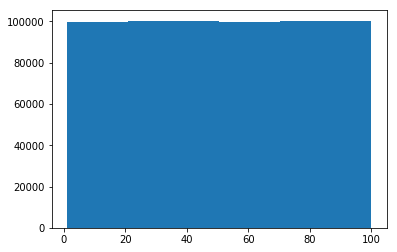

In [3]:
%matplotlib inline
plt.hist(data)

El grafico muestra una distribucion uniforme. Es decir que todos los datos tienen la misma probabilidad de salir. **Se han generado un millon de datos entre el rango de 1 a 200**

## La Distribucion Normal o campana de Gauss
![distribucion normal](../Recursos/imgs/distrinormal.PNG)

Este es el tipo de distribución más comun, lo podemos ver con las notas de un examen de fisica. La mayoria saca mala nota y muy pocos buena nota.
Los valores que definen una distribucion normal son:

**La media** Valor central. Promedio. En el grafico *este valor es de 0*

**Desviacion tipica** en el grafico este valor es de *1*

Para generar datos con distribucion normal en python usamos *(atención a las siguietnes lineas)*:

In [4]:
data = np.random.randn(1000000)

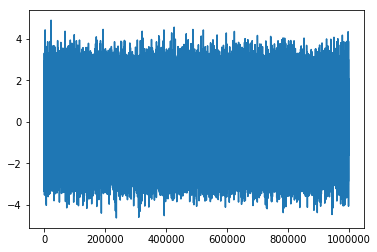

In [5]:
x = range(1,1000001)
plt.plot(x,data) #pinto grafico de los datos generados

(array([1.19000e+02, 3.23300e+03, 3.54110e+04, 1.69223e+05, 3.47490e+05,
        3.07247e+05, 1.17132e+05, 1.88510e+04, 1.25500e+03, 3.90000e+01]),
 array([-4.62531341, -3.67256615, -2.7198189 , -1.76707164, -0.81432439,
         0.13842287,  1.09117012,  2.04391738,  2.99666464,  3.94941189,
         4.90215915]),
 <a list of 10 Patch objects>)

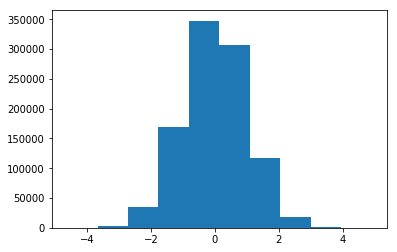

In [6]:
%matplotlib inline
plt.hist(data)

Ahora ya parece una campana en nuestro histograma

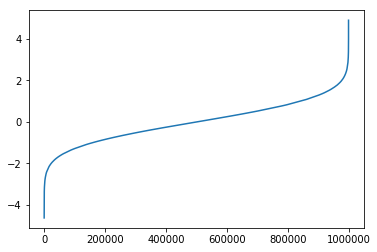

In [7]:
plt.plot(x, sorted(data)) #generamos un grafico de funcion de distribucion acumulada

Una distribucion normal se ve asi en su distribucion acumulada, la anterior es una manera de distinguirla de otro tipo de distribución

**Y si queremos otros datos de la media (mu), desviacion estandar(sd)?** veamos:

(array([2.400e+01, 1.760e+02, 8.060e+02, 2.059e+03, 3.048e+03, 2.476e+03,
        1.090e+03, 2.870e+02, 3.300e+01, 1.000e+00]),
 array([-3.59122543, -1.62734521,  0.33653501,  2.30041523,  4.26429545,
         6.22817567,  8.19205589, 10.1559361 , 12.11981632, 14.08369654,
        16.04757676]),
 <a list of 10 Patch objects>)

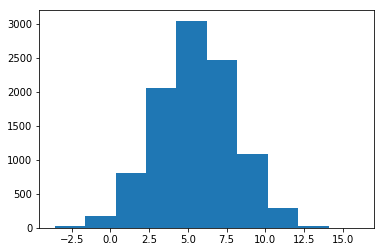

In [8]:
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
data = mu + sd* Z# Z = (X-mu) / sd -> N(0,1), X= mu + sd * z === teorema central del limite o "tipificar"
plt.hist(data)

El siguiente codigo es utilizado para generar dataset aleatorios

In [9]:
data = np.random.randn(2,4) #genera dos columnas de 4 filas
data

array([[ 0.79608693, -0.54680149,  0.40070998, -0.74889125],
       [-0.48532038, -0.25657385,  1.48586482, -1.39867014]])

## La simulación de montecarlo (Para encontrar el valor de Pi)

![formula-pi](../Recursos/imgs/pi-montecarlo.PNG)

**Que vamos a hacer?**
* Generaremos dos numeros aleatorios uniformes entre 0 y 1. Estos seran x,y 1000 veces en total
* Calcularemos x^2 + y^2
    * Si el valor es menor que 1 -> estamos dentro del circulo
    * Si el valor es mayor que 1 -> estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el nuemro total de intentos para obener una aproximación de la probabilidad de caer dentro del circulo
* Usamos esa probabilidad para aproximar el valor de π
* Repetimos el experimento el numero suficiente de veces (mas o menos 200) para obtener diferentes aproximaciones de π
* Calculamos promedio de los 1000 valores para dar valor final a π

In [10]:
def pi_montecarlo(n, n_exp):   # n = valor de datos a generar ; n_exp = veces que repito el experimento
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value= 0
        x = np.random.uniform(0,1,n).tolist()#valores de 0 a 1. n datos (n=1000)
        y = np.random.uniform(0,1,n).tolist()
        
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value* 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    
    pi = pi_avg/n_exp
    
    print(pi)
    fig = plt.plot(pi_value_list)
    
    return(pi,fig)

3.1410279999999995


(3.1410279999999995, [<matplotlib.lines.Line2D at 0x25e00140a58>])

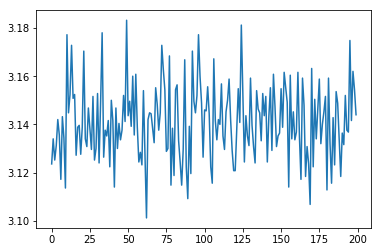

In [11]:
pi_montecarlo(10000,200)

## Dummy DataSets o DataFrames
Se trata de una lista o un array de numeros aleatorios generados con metodos que hemos visto en este notebook.

In [12]:
#vamos a generar el dataframe
n = 1000000
data = pd.DataFrame(#diccionario
    {
        'A': np.random.randn(n),# numeros aleatorios entre 0 y 1 - Distribucion normal 0 a 1
        'B': 1.5 + 2.5 * np.random.randn(n), #distribucion normal con media 1,5 y desviacion tipica 2.5
        'C': np.random.uniform(5,32,n)#valores de 5 a 32, generame n valores. Uniforme entre 5 y 32
    }
)

In [13]:
data.head()

,A,B,C
0,-0.257238,4.752025,18.618218
1,2.679173,-1.335807,21.996012
2,-1.897659,-1.392130,30.823376
3,-0.001277,1.625231,14.668660
4,-0.032890,5.557342,24.011802


In [14]:
data.describe() #veamos los valores para los tipos de distribucion 

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000685,1.502876,18.495745
std,0.999980,2.497234,7.788953
min,-4.614309,-9.997637,5.000122
25%,-0.674956,-0.181575,11.752310
50%,-0.000877,1.502884,18.485216
75%,0.674163,3.187453,25.248895
max,4.840203,13.972453,31.999991


(array([1.14000e+02, 3.10200e+03, 3.44690e+04, 1.65083e+05, 3.42637e+05,
        3.09622e+05, 1.22515e+05, 2.08900e+04, 1.51300e+03, 5.50000e+01]),
 array([-4.61430912, -3.66885795, -2.72340678, -1.77795562, -0.83250445,
         0.11294671,  1.05839788,  2.00384905,  2.94930021,  3.89475138,
         4.84020255]),
 <a list of 10 Patch objects>)

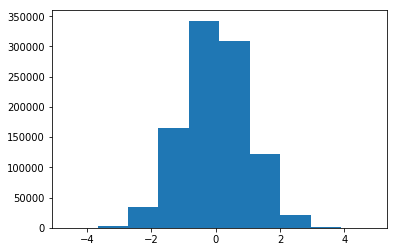

In [15]:
plt.hist(data["A"]) #pintamos la distribucion de A, es una normal estandar

(array([1.31000e+02, 3.62900e+03, 3.83210e+04, 1.79959e+05, 3.54821e+05,
        2.98918e+05, 1.06900e+05, 1.62680e+04, 1.02600e+03, 2.70000e+01]),
 array([-9.9976368 , -7.60062783, -5.20361886, -2.80660989, -0.40960092,
         1.98740805,  4.38441701,  6.78142598,  9.17843495, 11.57544392,
        13.97245289]),
 <a list of 10 Patch objects>)

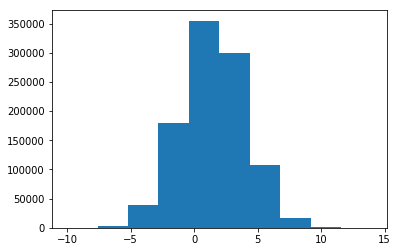

In [16]:
plt.hist(data["B"]) #pintamos la distribucion de B. Es una normal desplazada 1.5

(array([ 99821.,  99831., 100379., 100074., 100478.,  99913.,  99770.,
         99904., 100375.,  99455.]),
 array([ 5.00012228,  7.70010911, 10.40009595, 13.10008278, 15.80006961,
        18.50005645, 21.20004328, 23.90003011, 26.60001695, 29.30000378,
        31.99999061]),
 <a list of 10 Patch objects>)

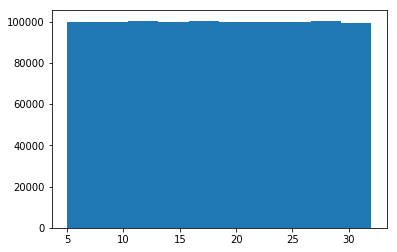

In [17]:
plt.hist(data["C"]) # es una distribucion uniforme entre 5 y 32

In [18]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
colum_names = data.columns.values.tolist()#creo lista con los nombres de las columnas

In [20]:
a = len(colum_names)
a#total de columnas

21

In [21]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42+a) #inicio a contar desde 42 
)

In [22]:
new_data

,Column Name,A,B
42,State,0.127593,0.997748
43,Account Length,-0.574178,0.250557
44,Area Code,0.647478,0.154221
45,Phone,-0.025454,0.242657
46,Int'l Plan,-0.025196,0.473883
47,VMail Plan,-0.828980,0.399384
48,VMail Message,-0.398354,0.789655
49,Day Mins,0.920331,0.328906
50,Day Calls,-0.437022,0.448917
51,Day Charge,-0.049500,0.466095
